<a href="https://colab.research.google.com/github/acorreia61201/SAOPythonPrimer/blob/main/solutions/Solutions6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAO/LIP Python Primer Course Exercise Set 6

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/acorreia61201/SAOPythonPrimer/blob/main/exercises/Exercises6.ipynb)

## Exercise 1: Basic Plotting

To start, we'll generate some basic plots so you can get the hang of using `matplotlib`. You may change the size of each figure 

**Your task:** Generate a plot of $|x|$ over $x = [-5, 5]$. No modifications needed.

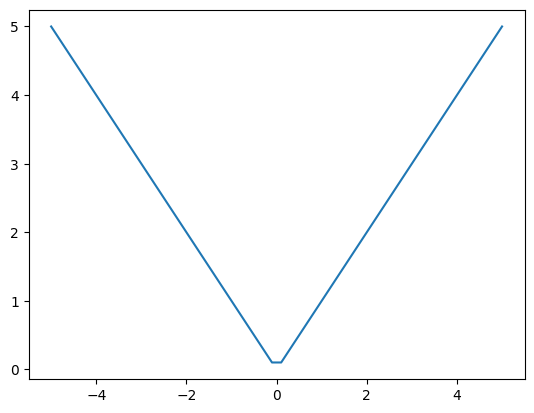

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 50) # range to plot over
plt.plot(x, abs(x)) # plot abs(x) at each x value

# you may see a straight line in the center; this is because we're plotting a bunch of connected discrete points, not the exact function
# increasing the length of x will remedy this

**Your task:** Generate a plot containing $x^3$ and $3x^2$ over $x = [-5, 5]$. Make $x^3$ a blue solid line and $3x^2$ an orange dashed line, and label them "y" and "dy/dx" respectively. Place the legend in the top left.

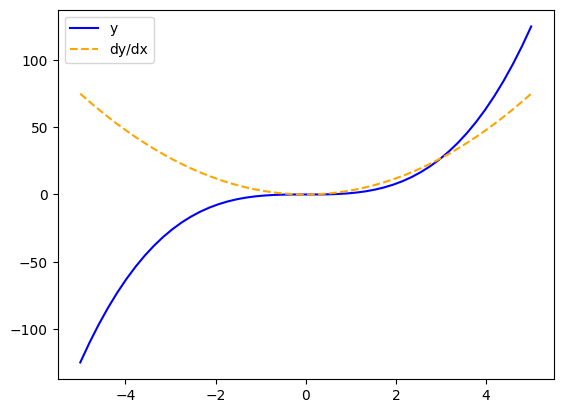

In [ ]:
y = x**3 # cubed values
dy = 3*x**2 # squared values
plt.plot(x, y, color='blue', linestyle='solid', label='y') # plot x**3 as a blue line, label as y
plt.plot(x, dy, color='orange', linestyle='dashed', label='dy/dx') # plot 3x**2 as an orange dashed line, label as dy/dx
plt.legend(loc='upper left') # put a legend in the upper left

**Your task:** Generate a scatterplot of $\tan(x)$ on the range $[-\pi, \pi]$ (`matplotlib` automatically handles the asymptotes). Make the points red circles. Add dashed grey lines at the asymptotes $x = -\pi/2, \pi/2$. Adjust the x ticks so that they mark every half-integer multiple of $\pi$ (i.e. $-\pi$, $-\pi/2$, 0,...).

([<matplotlib.axis.XTick at 0x7f7ffeeec370>,
 [Text(-3.141592653589793, 0, '$-\\pi$'),
  Text(-1.5707963267948966, 0, '$-\\pi/2$'),
  Text(0.0, 0, '0'),
  Text(1.5707963267948966, 0, '$\\pi/2$'),
  Text(3.141592653589793, 0, '$\\pi$')])

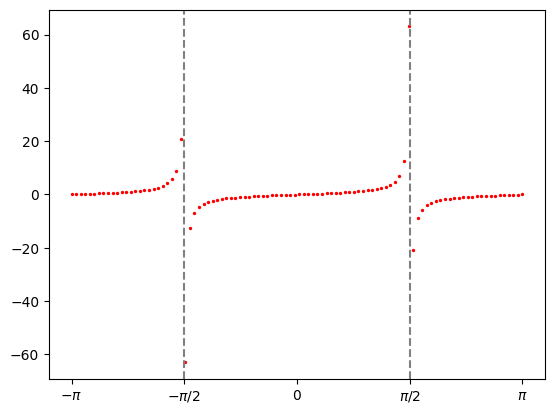

In [ ]:
x = np.linspace(-np.pi, np.pi, 100) # generate array from -pi to pi
y = np.tan(x) # generate array of tangent values
plt.scatter(x, y, color='red', marker='o', s=2) # plot tan(x) vs x with red circles (changed size with s=2; this wasn't necessary)
plt.axvline(np.pi/2, color='grey', linestyle='dashed') # plot vertical line at pi/2; whatever strategy you prefer works
plt.axvline(-np.pi/2, color='grey', linestyle='dashed') # plot vertical line at -pi/2
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$']) # change ticks and tick labels

**Your task:** Generate an array of 5000 randomly sampled points from a normal distribution with mean 0 and variance 1 (use `numpy.random.normal()`; see the docs at https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). Generate a histogram with 20 bins using this data.

(array([  4.,   3.,  20.,  29.,  88., 141., 248., 351., 481., 639., 666.,
        666., 564., 469., 285., 179.,  96.,  45.,  20.,   6.]),
 array([-3.6204279 , -3.28190369, -2.94337948, -2.60485527, -2.26633106,
        -1.92780685, -1.58928264, -1.25075843, -0.91223422, -0.57371001,
        -0.2351858 ,  0.1033384 ,  0.44186261,  0.78038682,  1.11891103,
         1.45743524,  1.79595945,  2.13448366,  2.47300787,  2.81153208,
         3.15005629]),
 <BarContainer object of 20 artists>)

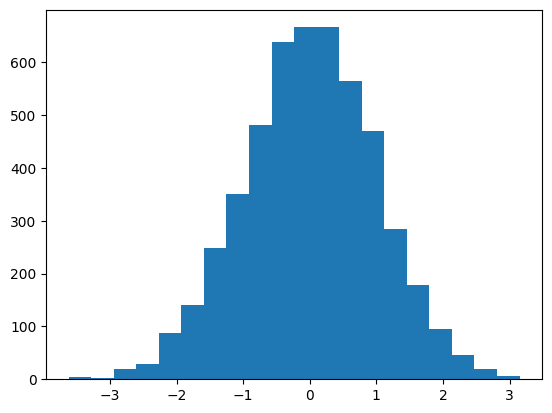

In [ ]:
x = np.random.normal(0, 1, 5000) # generate normal distribution centered at 0 with variance of 1
plt.hist(x, 20) # plot histogram with 20 bins

**Your task:** Generate a figure with two plots next to each other as follows:

- The plot on the left should be a scatterplot of $1/x$ over the range $[-5, 5]$. The points should be orange triangles. Plot a grey dotted line at the horizontal asymptote and a green dashed line at the vertical asymptote (the asymptotes of $1/x$ are $x=0, y=0$). Set the y-axis to the range $[-5, 5]$. Title this plot "Scatterplot".
- The plot on the right should be a 2D histogram, where each axis is a series of 5000 points sampled from a normal distribution. The x-axis should have 30 bins, and the y-axis should have 15 bins. Title this plot "Histogram".

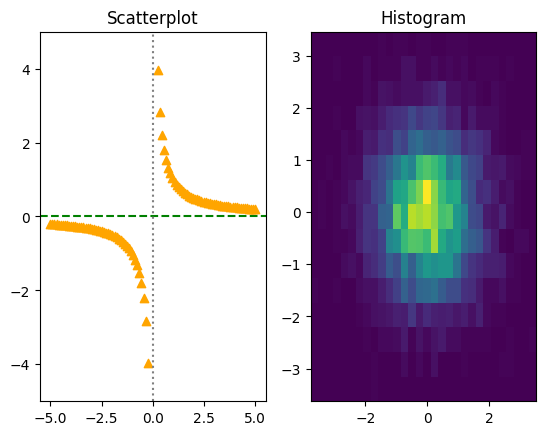

In [ ]:
x = np.linspace(-5, 5, 100) # generate points for left plot
xrand = np.random.normal(0, 1, 5000) # generate normal distribution of x points
yrand = np.random.normal(0, 1, 5000) # generate normal distribution of y points

fig, ax = plt.subplots(1, 2) # generate two plots side-by-side
# left plot
ax[0].scatter(x, 1/x, color='orange', marker='^') # plot 1/x with orange triangles
ax[0].axhline(0, color='green', linestyle='dashed') # plot horizontal asymptote with green dashed line
ax[0].axvline(0, color='grey', linestyle='dotted') # plot vertical asymptote with orange dotted line
ax[0].set_ylim(-5, 5) # change y range of plot to [-5, 5]
ax[0].set_title('Scatterplot') # title the left plot
# right plot
ax[1].hist2d(xrand, yrand, bins=(30, 15)) # plot 2D hist; specify bins=(xbins, ybins)
ax[1].set_title('Histogram') # title the right plot
plt.show()

## Exercise 2: Freefall Motion, revisited

Recall the one-dimensional equation of motion of an object in freefall near the surface of Earth:

\begin{equation}
y(t) = y_0 + v_{y,0}t + \frac{1}{2}gt^2
\end{equation}

Here, $y$ is the position of the object at time $t$, $y_0$ and $v_{y,0}$ are the initial position and time of the object (at time $t=0$, and $g = -9.81 m/s^2$ is the acceleration due to gravity near the Earth's surface. Let's plot a series of scenarios.

**Your task:** If I drop a ball off a roof 200 m high, how long will it take to hit the ground? To "solve" this, generate a plot over $t=[0, 10]$ and use the above equation to compute the positions. Draw a dashed grey line at $y=0$ to signify the ground; the solution will be the point at which the solid line intersects this dashed line. Label the y-axis 'y (m)' and the x-axis 't (s)'. You can check with your result from Exercise Set 1.

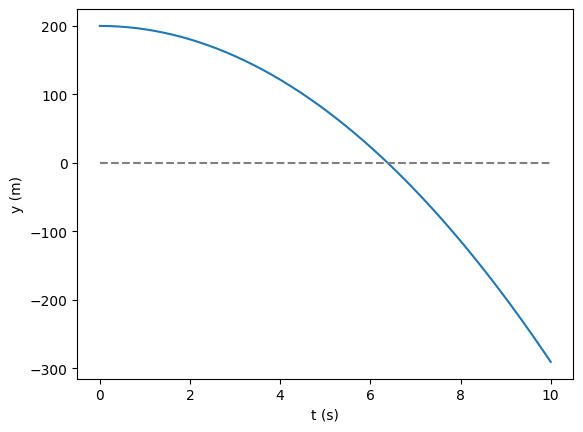

In [ ]:
t = np.linspace(0, 10, 200) # array of times
y = 200 - 0.5*9.81*t**2 # array of positions

plt.plot(t, y) # position vs time
plt.plot(t, [0 for i in t], linestyle='dashed', color='grey') # label the ground
plt.xlabel('t (s)') # x label
plt.ylabel('y (m)') # y label
plt.show()

**Your task:** What if I instead threw the ball upwards at $10 m/s$ from a 150 m tall building? Generate a plot as you did above with this new setup, again drawing a dashed line at $y=0$.

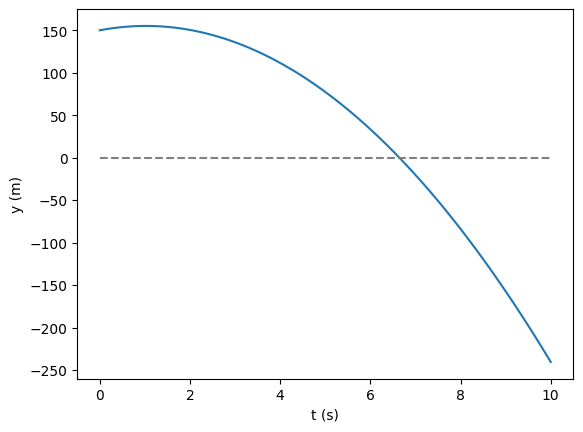

In [ ]:
t = np.linspace(0, 10, 200) # array of times
y = 150 - 0.5*9.81*t**2 + 10*t # array of y values

plt.plot(t, y) # position vs time
plt.plot(t, [0 for i in t], linestyle='dashed', color='grey') # horizontal line to represent the ground
plt.xlabel('t (s)') # x label
plt.ylabel('y (m)') # y label
plt.show()

Let's compare the positions in these scenarios to the velocity of the ball, which you may recall can be calculated as follows:

\begin{equation}
v_y(y) = v_{y,0} + gt
\end{equation}

**Your task:** What if I threw the ball upwards at $15 m/s$ from a 180 m tall building? Generate two plots, with the top plot showing the position of the ball over time and the bottom plot showing the velocity over time. Draw a horizontal dotted line at $v = 0$ on the velocity plot; this signifies the time at which the ball reaches its maximum height. Label the top y-axis 'y (m)', the bottom y-axis 'v (m/s)', and the bottom x-axis 't (s)'.

Text(0.5, 0, 't (s)')

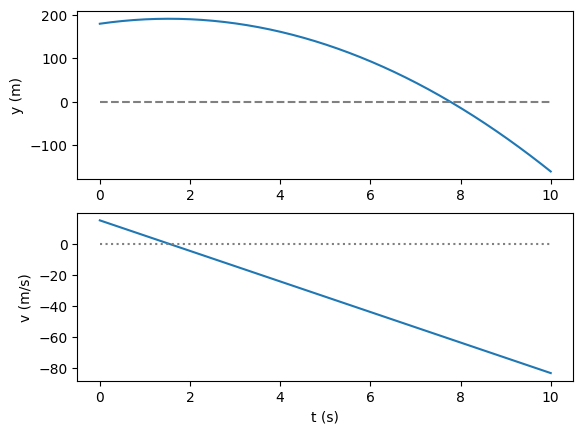

In [ ]:
t = np.linspace(0, 10, 200) # times from 0 to 10 seconds
y = 180 - 0.5*9.81*t**2 + 15*t # populate list of y vals
v = 15 - 9.81*t # populate list of v vals

fig, ax = plt.subplots(2, 1) # generate two plots next to each other
ax[0].plot(t, y) # position vs time
ax[0].plot(t, [0 for i in t], linestyle='dashed', color='grey') # plot the ground
ax[0].set_ylabel('y (m)') # label y axis

ax[1].plot(t, v) # velocity vs time
ax[1].plot(t, [0 for i in v], linestyle='dotted', color='grey') # plot the inflection point
ax[1].set_ylabel('v (m/s)') # label y axis
ax[1].set_xlabel('t (s)') # label x axis

## Exercise 3: Verifying Series Approximations

There are a couple ways that we can verify the series approximations we've been doing.

**Your task:** Let's use the following series:

\begin{equation}
\cos(x) = \sum_{n=0}^\infty (-1)^n \frac{x^{2n}}{(2n)!}
\end{equation}

Write a function that calculates this series approximation for an array of $x$ values.

In [ ]:
import math as m

def cos_approx(x, n):
    series = 0 # placeholder value
    for i in range(n+1):
        series += (-1)**i*x**(2*i)/m.factorial(2*i) # add ith term up to n
    return series

One way we can verify the series approximation is by plotting each term's function.

**Your task:** Calculate the first 5 terms of the above series over the range $[-2\pi, 2\pi]$. Plot these functions as well as $\cos(x)$, which you should plot with a thick black line, on the given range. Label each term by its $n$ value. Set the y-limit to $[-1.5, 1.5]$ so the actual function remains visible.

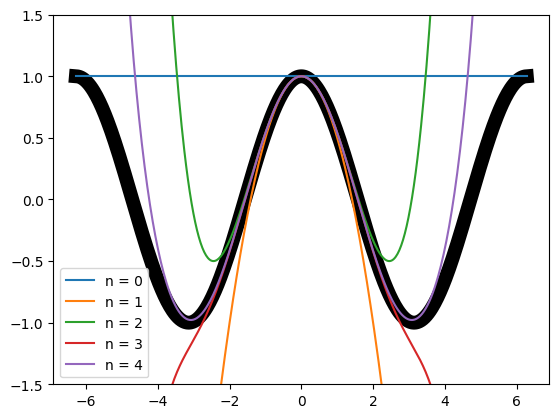

In [ ]:
x = np.linspace(-2*np.pi, 2*np.pi, 500) # generate points from -2pi to 2pi
plt.plot(x, np.cos(x), linewidth=10, color='black') # plot the exact function in a thick black line
for i in range(5): # use iteration to plot the first five series
    y = cos_approx(x, i) # create an array representing y vals of approx with n terms
    plt.plot(x, y, label=f'n = {i}') # plot the contribution and label it by n

plt.ylim(-1.5, 1.5) # set y_lim
plt.legend()

We can also compute the error between the real function and its series approximation at each term.

**Your task:** Calculate the series approximation to $\cos(x)$ for the first 30 terms for $x=\pi/2$. For each term, evaluate the absolute value of the difference between $cos(\pi/2)$ and the term. Make a plot where the x values are the term numbers and the y values are the absolute differences. Draw a horiontal line at $y=0$; the series should approach this value.

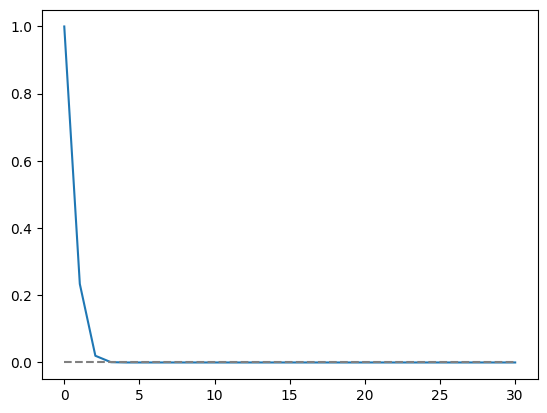

In [ ]:
approx = []
for i in range(31):
    approx.append(cos_approx(np.pi/2, i)) # add approximations to list at x = pi/2
abs_errs = [abs(np.cos(np.pi/2) - i) for i in approx] # calculate absolute errors
n_terms = np.linspace(0, 30, 31) # define n values
plt.plot(n_terms, abs_errs) # plot n vals vs abs errs
plt.plot(n_terms, [0 for i in n_terms], color = 'grey', linestyle='dashed') # plot horizontal line using list comprehension

**Your task:** Generate a second plot similar to the analysis above, this time evaluating at $x = 4\pi$. Does the absolute difference still converge to zero? Is it faster or slower than at $x=\pi/2$?

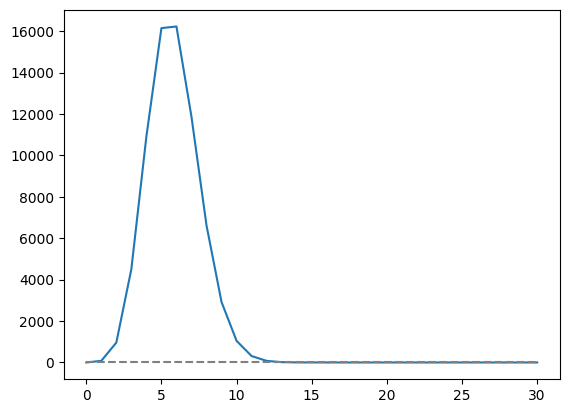

In [ ]:
approx = [] # placeholder list
for i in range(31):
    approx.append(cos_approx(4*np.pi, i)) # add approximations to list at x = 4*pi
abs_errs = [abs(np.cos(4*np.pi) - i) for i in approx] # calculate absolute errors
n_terms = np.linspace(0, 30, 31) # define n values (for 0 to 30 we'll have 31 points)
plt.plot(n_terms, abs_errs) # n vals vs abs errs
plt.plot(n_terms, [0 for i in n_terms], color = 'grey', linestyle='dashed') # plot horizontal line using list comprehension

## Exercise 4: Computational Derivatives

Another problem that's tricky to implement on a computer is *differentiation*. For most functions, calculating derivatives by hand is trivial using basic calculus principles. However, as with many problems, we need an algorithm to "tell" the computer how to differentiate. One way to evaluate derivatives is with the *finite difference method*:

\begin{equation}
\frac{dy}{dx}\bigg|_{x=a} = \lim_{\Delta x \rightarrow 0}\frac{y(a + \Delta x) - y(a)}{\Delta x}
\end{equation}

The left-hand side reads "the derivative of $y$ with respect to $x$ evaluated at $x=a$. $\Delta x$ is a parameter that we control; as $\Delta x$ approaches zero, the equation on the right should approach the equation on the left.

**Your task:** Write a function that takes in a function `y` and two values $a$ and $\Delta x$ and outputs the derivative of $y(a)$. Test this with some functions with simple derivatives like $x^2$ or $e^x$.

In [ ]:
def findiff(y, a, dx):
    num = y(a + dx) - y(a) # numerator
    den = dx # denominator
    return num/den # finite difference formula

# testinmg with x**2
def square(x):
    return x**2

# we should get back ~2a
findiff(square, 5, 0.1)

10.09999999999998

Let's try doing a more robust test by plotting the function we get out.

**Your task:** Evaluate the derivative of $e^x$ at 100 values in the range $a = (-3, 3)$ with $\Delta x = 0.01$. Plot these values as a scatterplot with red circles. Also plot $e^x$ as a solid blue line. As you probably know, $e^x$ is a function whose derivative is itself; is that the case here? Play around with the $\Delta x$ value; how does increasing or decreasing it change the fit?

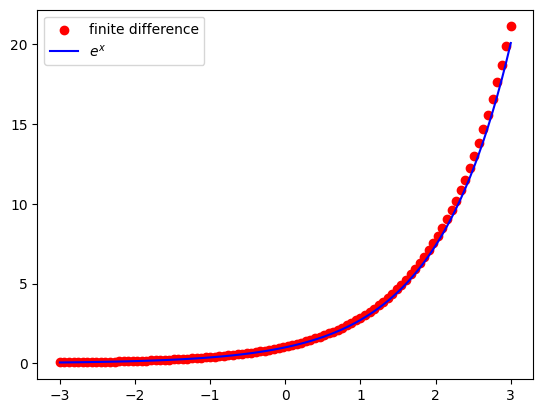

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def expon(x):
    return np.exp(x)

a = np.linspace(-3, 3, 100)
exp_a = np.empty(100)
for i in range(100):
    exp_a[i] = findiff(expon, a[i], 0.1)

plt.scatter(a, exp_a, color='red', marker='o', label='finite difference')
plt.plot(a, np.exp(a), color='blue', label=r'$e^x$')
plt.legend()

Now, let's see how changing $\Delta x$ changes the fit.

**Your task:** Define the following as a function:

\begin{equation}
y(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
\end{equation}

Now, define an array of 100 points in the range $\Delta x = [10^{-6}, 10^{-1}]$ using `numpy.geomspace()`. Calculate the derivative of the above equation using your finite difference function over your array, fixing $a = 1$. 

In [ ]:
def norm(x):
    return np.exp(-x*x/2)/np.sqrt(2*np.pi) # the normal distribution

dx = np.geomspace(10**-6, 10**-1, 100) # 100 points evenly spaced on log scale
vals = np.empty(100) # placeholder array
for i in range(100):
    vals[i] = findiff(norm, 1, 10**dx[i]) # append finite difference values

The derivative of the above expression is (you can check this using the chain rule):

\begin{equation}
y'(x) = -\frac{xe^{-x^2/2}}{\sqrt{2\pi}} 
\end{equation}

Using the derivative values you obtained above, evaluate the absolute difference between this equation evaluated at $x=1$ and those values. Plot the log of the absolute differences versus $\log \Delta x$, labelling the axes accordingly. Your results should approach some very small value on the left hand side; is that the case here?

Text(0, 0.5, 'absolute errors')

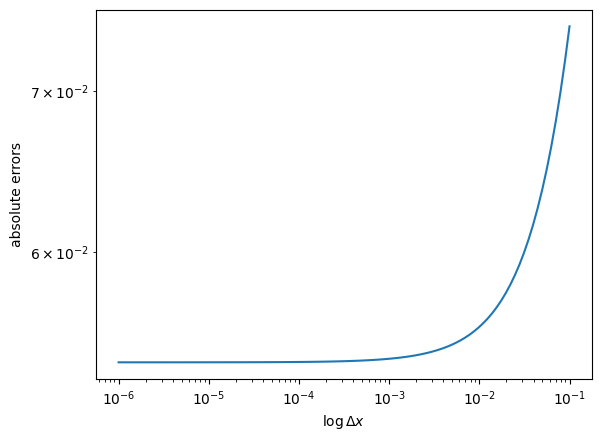

In [ ]:
def dnorm(x):
    return -x*norm(x) # f'(x) = -x*f(x)

abs_errs = abs(dnorm(1) - vals) # calculate abs errs using findiff values
plt.loglog(dx, abs_errs) # plot on loglog
plt.xlabel(r'$\log \Delta x$')
plt.ylabel(r'absolute errors')

## Exercise 5: Comparing Numerical Integrators

Let's use a plot to compare how well the trapezoidal and Monte-Carlo methods of computing integrals approximate their true values. 

**Your task:** Write functions that compute the trapezoidal and Monte-Carlo integrals for a given function. We've done this already in a previous set; feel free to copy them here. (Hint: You may have to modify the Monte-Carlo function to work over 1D space; in this case, we'll only be considering one-variable functions, and we'll only need one randomized set of $x$ values.)

In [ ]:
def trapezoidal(a, b, n, f):
    grid = np.linspace(a, b, n+1) # generate grid
    dx = (b-a)/n # spacing
    sum = f(a) + f(b) # initial value; evaluate edge points
    for i in range(1, n): # iterate from 1 to n-1
        sum += f(grid[i])*2 # add middle terms
    return sum * dx / 2 # multiply prefactor

def monte_carlo(a, b, n, f):
    grid = np.random.uniform(a, b, n) # generate random grid
    V = b - a # "volume" element
    sum = 0 # initial value
    for i in range(n): # iterate over entire list; can also do i in grid and do f(i) directly
        sum += f(grid[i]) # add terms
    return sum * V / n # multiply prefactor

**Your task:** Generate a range of 50 $n$ values over $[10, 10^6]$ using `numpy.geomspace()`. Use the trapezoidal method to estimate the integral of the normal distribution function that you defined earlier:

\begin{equation}
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
\end{equation}

Integrate over the range $x = [-2, 2]$ using the array of $n$ values you've defined. Save the results to a list for later.

In [ ]:
n = np.geomspace(10, 10**6, 50, dtype=np.int64) # remember we have to cast these as ints
trap_vals = [] # placeholder list
for i in range(50):
    trap_vals.append(abs(0.954499736103642 - trapezoidal(-2, 2, n[i], norm))) # we defined the normal distribution above; I'm also appending the abs vals here

**Your task:** Do the same as above, except using the Monte-Carlo method.

In [ ]:
mc_vals = [] # placeholder list
for i in range(50):
    mc_vals.append(abs(0.954499736103642 - monte_carlo(-2, 2, n[i], norm))) # also appending abs vals here

**Your task:** The true value of the integral is 0.954499736... Calculate the absolute errors between your calculated values and the true value. Plot the trapezoidal and Monte-Carlo absolute errors on one loglog plot. Label both lines with their appropriate methods, the x-axis as "n", and the y-axis as "absolute error". Both should approach a very small value as $n$ increases; is that the case? Does either appear to be better?

[0.05768514238581457, 0.02223701419598101, 0.03505268358164726, 0.07454081301742121, 0.012780173354901114, 0.1116682699568633, 0.09186153018212395, 0.060237267339762424, 0.07322327550600982, 0.029672463666024718, 0.04710009060184106, 0.05260457590409906, 0.04660425796628431, 0.010405466340334235, 0.010669705050676215, 0.010088853245819207, 0.028142868621308548, 0.02116810609617159, 0.007118275894453352, 0.021843055586009963, 0.00674677646152233, 0.015427844998218365, 0.0030693361816823694, 0.0023612268796041613, 0.010726308395220596, 0.01587003612879312, 0.004945530615399596, 0.0019238125860958633, 0.0032065051574754477, 0.0027069894154140295, 0.01278555171984097, 0.004252618654641327, 0.0008000843893705145, 0.0007202180643185452, 0.004411780870472448, 0.0030235961006730427, 0.0011692260745279626, 0.0020272754548499305, 0.003406983419256271, 0.0001678347367450872, 0.0016210076184196565, 0.00030800679083420324, 0.0006791111288014795, 0.0008527815568728503, 0.0017794070997433353, 0.00029

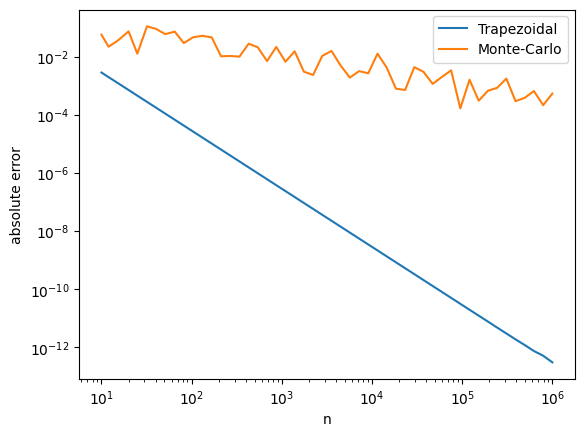

In [ ]:
plt.loglog(n, trap_vals, label='Trapezoidal') # plot trapezoidal errs
plt.loglog(n, mc_vals, label='Monte-Carlo') # plot MC errs
plt.xlabel('n') # x label
plt.ylabel('absolute error') # y label
plt.legend() # show legend